# DS 201 Final Project -- Part 2
---
## Stage 1: Abstract
- **What is the dataset? Detail description.** \\
The problem we are attempting to solve is regarding NLP (Natural Language Processing); therefore, our dataset will be a feature-enriched corpus for word-tagging.
The dataset we are using is custom-made by us based on the brown corpus. This corpus contains sentences with words and their associated Part of Speech tag. To create a structure for our machine learning, we had to couple with new features based on its part of speech from the provided sentences.<sup>1</sup>
- **What is the questions/answer you expect to find. What pattern that you expect to get from working with this data?** \\
Our goal with this dataset is to create a NLP POS Tagger; an algorithm that can effectively mark significant parts of speech (or sentences). This can include nouns, verbs, adjectives, punctuation, etc.
This requires 2 parts. First, a large dataset containing words and their correct labels. Second, an effective classification algorithm that will have high accuracy in determining the effective tag of each word.
- **What are the benefits of this project to organization?** \\
POS Tagging is an effective part of Natural Language Processing and allows for a processor to indicate and identify features of a sentence including subject, outcome, target, objects. This is a necessary building block for creating a LLM (Large Language Model). There exist tools, such as NLTK (Natural Language ToolKit) that LLMs like ChatGPT are using which are founded on their POS Tagging Algorithm and its ML classification.

[1] function: pos_features() -> {} takes a sentence and returns each word with new features based on its sentence feature; sentence position, prefixes, suffixes, etc.

In [6]:
# Standard imports for DS projects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Import NLTK and our corpi
import nltk
nltk.download('treebank') # Download the Treebank corpus
nltk.download('brown') # Download the Brown corpus
from nltk.corpus import treebank
from nltk.corpus import brown

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [33]:
# Feature Extraction Function
def pos_features(sentence, i):
    features = {
        'word': sentence[i],
        'is_first': i == 0,
        'is_last': i == len(sentence) - 1,
        'is_capitalized': sentence[i][0].upper() == sentence[i][0],
        'is_all_caps': sentence[i].upper() == sentence[i],
        'is_all_lower': sentence[i].lower() == sentence[i],
        'prefix-1': sentence[i][0],
        'prefix-2': sentence[i][:2],
        'prefix-3': sentence[i][:3],
        'suffix-1': sentence[i][-1],
        'suffix-2': sentence[i][-2:],
        'suffix-3': sentence[i][-3:],
        'prev_word': '' if i == 0 else sentence[i-1],
        'next_word': '' if i == len(sentence)-1 else sentence[i+1]
    }
    return features

# Create a list of features from a list of tagged sentences
def get_features(tagged_sents):
  features = []
  for sent in tagged_sents:
      for i in range(len(sent)):
          features.append((pos_features([word for word, tag in sent], i), sent[i][1]))
  return features

In [54]:
# Assert Data
treebank_ts = treebank.tagged_sents()
# brown_ts = brown.tagged_sents()
# features = get_features(brown_ts)
features = get_features(treebank_ts)

In [55]:
# Creating our dataframe
features[0][0]['pos_tag'] = features[0][1]
columns = list(features[0][0].keys())
values = []
for i in range(len(features)):
  features[i][0]['pos_tag'] = features[i][1]
  values.append(list(features[i][0].values()))
df = pd.DataFrame(values, columns=columns)

In [56]:
df.head()

,word,is_first,is_last,is_capitalized,is_all_caps,is_all_lower,prefix-1,prefix-2,prefix-3,suffix-1,suffix-2,suffix-3,prev_word,next_word,pos_tag
0,Pierre,True,False,True,False,False,P,Pi,Pie,e,re,rre,,Vinken,NNP
1,Vinken,False,False,True,False,False,V,Vi,Vin,n,en,ken,Pierre,",",NNP
2,",",False,False,True,True,True,",",",",",",",",",",",",Vinken,61,","
3,61,False,False,True,True,True,6,61,61,1,61,61,",",years,CD
4,years,False,False,False,False,True,y,ye,yea,s,rs,ars,61,old,NNS


In [66]:
df.columns

Index(['word', 'is_first', 'is_last', 'is_capitalized', 'is_all_caps',
       'is_all_lower', 'prefix-1', 'prefix-2', 'prefix-3', 'suffix-1',
       'suffix-2', 'suffix-3', 'prev_word', 'next_word', 'pos_tag'],
      dtype='object')

In [71]:
len(df)

100676

## Stage 2: Get the Data
**1. Prepare the dataset:**
  - How you will get the data \\
    The data was collected by combining multiple nltk corpi and extracting their unique features.
  - How you clean your data \\
    To clean the data, we must remove all duplicates, fill missing values, and measure the balance of values within the dataset.
  - How did you prepare the data \\
  To prepare the data, we ran all of the tagged sentences through a feature generating funciton that gave each word features based on its structure within each sentence. This allowed it to be extracted from the sentence while still having factors that lead to better probabilistic decidability when being evaluated by the classifier.

In [57]:
# All unique POS tags
tags = df['pos_tag'].unique()
tags, len(tags)

(array(['NNP', ',', 'CD', 'NNS', 'JJ', 'MD', 'VB', 'DT', 'NN', 'IN', '.',
        'VBZ', 'VBG', 'CC', 'VBD', 'VBN', '-NONE-', 'RB', 'TO', 'PRP',
        'RBR', 'WDT', 'VBP', 'RP', 'PRP$', 'JJS', 'POS', '``', 'EX', "''",
        'WP', ':', 'JJR', 'WRB', '$', 'NNPS', 'WP$', '-LRB-', '-RRB-',
        'PDT', 'RBS', 'FW', 'UH', 'SYM', 'LS', '#'], dtype=object),
 46)

In [69]:
# Count the number of duplicates
df.duplicated().sum()

16417

In [73]:
# Drop duplicates
df = df.drop_duplicates()

In [76]:
# Count the number of missing values in each column
df.isna().sum()

word              0
is_first          0
is_last           0
is_capitalized    0
is_all_caps       0
is_all_lower      0
prefix-1          0
prefix-2          0
prefix-3          0
suffix-1          0
suffix-2          0
suffix-3          0
prev_word         0
next_word         0
pos_tag           0
dtype: int64

In [77]:
# There don't appear to be any missing or empty values but we will
#  call the dropna() function to drop the missing values in the case our
#  dataset changes in the future.
df = df.dropna()

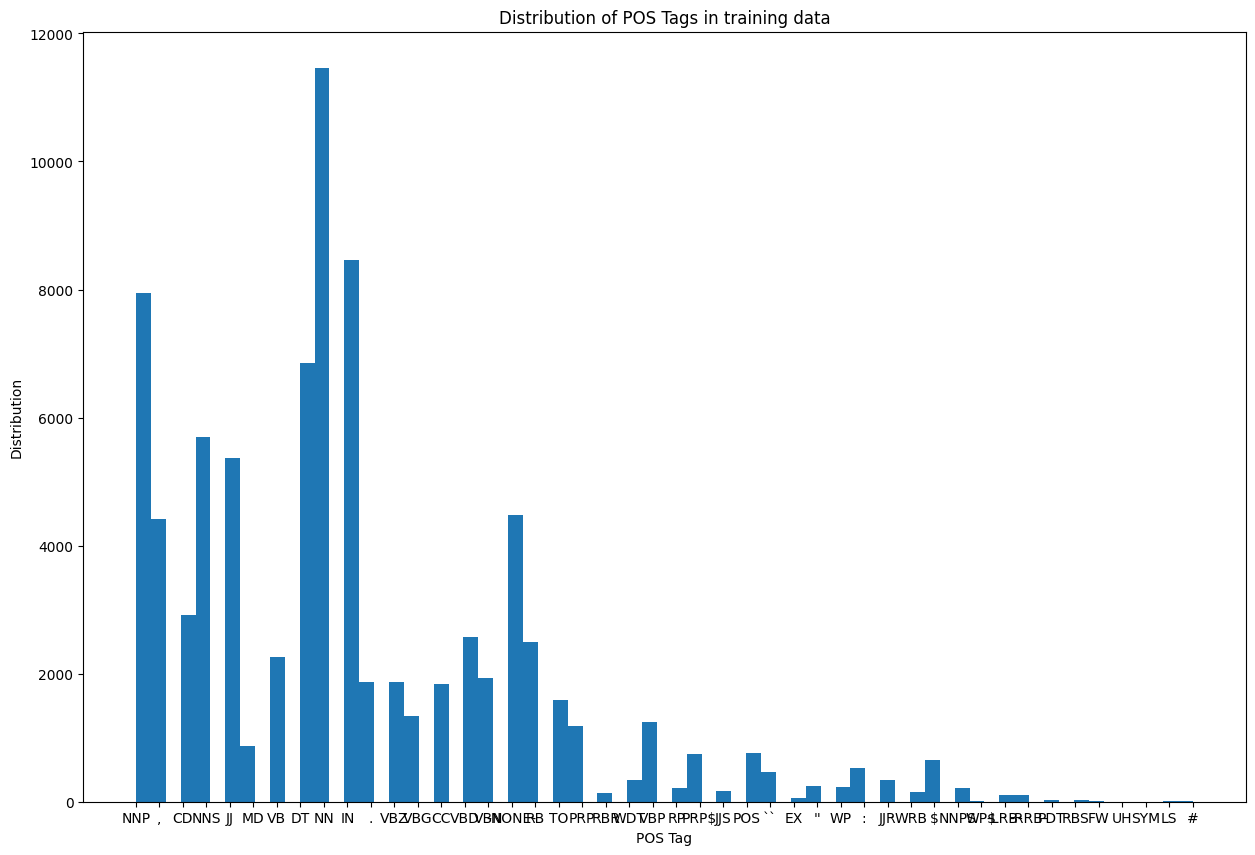

In [78]:
# Distribution of POS tags
plt.figure(figsize=(15,10))
plt.hist(df['pos_tag'], bins=len(tags)+25)
plt.title('Distribution of POS Tags in training data')
plt.xlabel('POS Tag')
plt.ylabel('Distribution')
plt.show()

The distribution seems to fairly match the standard distribution of words within a sentence.

If the distribution was greater skewed, we could remove some random values from different buckets to even out the distribution of each pos_tag

## Stage 3: Explore the Data
- Descriptive Analysis
- Make lots of charts
- Get to know the data, develop hypothesis, patterns? Anomolies?
- Problem with data? How to improve this dataset in the future?

In [79]:
# Basic description of the data
df.describe()

,word,is_first,is_last,is_capitalized,is_all_caps,is_all_lower,prefix-1,prefix-2,prefix-3,suffix-1,suffix-2,suffix-3,prev_word,next_word,pos_tag
count,84259,84259,84259,84259,84259,84259,84259,84259,84259,84259,84259,84259,84259,84259,84259
unique,12408,2,2,2,2,2,76,762,3337,74,666,2536,12403,11964,46
top,",",False,False,False,False,True,t,th,",",e,",",",",",",",",NN
freq,4422,81568,82546,56840,67725,71327,8322,5283,4422,11717,4422,4422,3315,3918,11454


In [80]:
# Top 50 rows from the DataFrame
df.head(50)

,word,is_first,is_last,is_capitalized,is_all_caps,is_all_lower,prefix-1,prefix-2,prefix-3,suffix-1,suffix-2,suffix-3,prev_word,next_word,pos_tag
0,Pierre,True,False,True,False,False,P,Pi,Pie,e,re,rre,,Vinken,NNP
1,Vinken,False,False,True,False,False,V,Vi,Vin,n,en,ken,Pierre,",",NNP
2,",",False,False,True,True,True,",",",",",",",",",",",",Vinken,61,","
3,61,False,False,True,True,True,6,61,61,1,61,61,",",years,CD
4,years,False,False,False,False,True,y,ye,yea,s,rs,ars,61,old,NNS
5,old,False,False,False,False,True,o,ol,old,d,ld,old,years,",",JJ
6,",",False,False,True,True,True,",",",",",",",",",",",",old,will,","
7,will,False,False,False,False,True,w,wi,wil,l,ll,ill,",",join,MD
8,join,False,False,False,False,True,j,jo,joi,n,in,oin,will,the,VB
9,the,False,False,False,False,True,t,th,the,e,he,the,join,board,DT


In [92]:
# DataFrame grouped by POS Tag
df3 = df.groupby("pos_tag").size()
df3

pos_tag
#            16
$           659
''          253
,          4423
-LRB-       103
-NONE-     4479
-RRB-        99
.          1873
:           533
CC         1838
CD         2920
DT         6847
EX           52
FW            4
IN         8468
JJ         5371
JJR         341
JJS         170
LS           12
MD          866
NN        11454
NNP        7945
NNPS        218
NNS        5692
PDT          26
POS         761
PRP        1185
PRP$        742
RB         2495
RBR         131
RBS          34
RP          211
SYM           1
TO         1593
UH            3
VB         2266
VBD        2580
VBG        1345
VBN        1930
VBP        1250
VBZ        1871
WDT         343
WP          223
WP$          14
WRB         159
``          460
dtype: int64

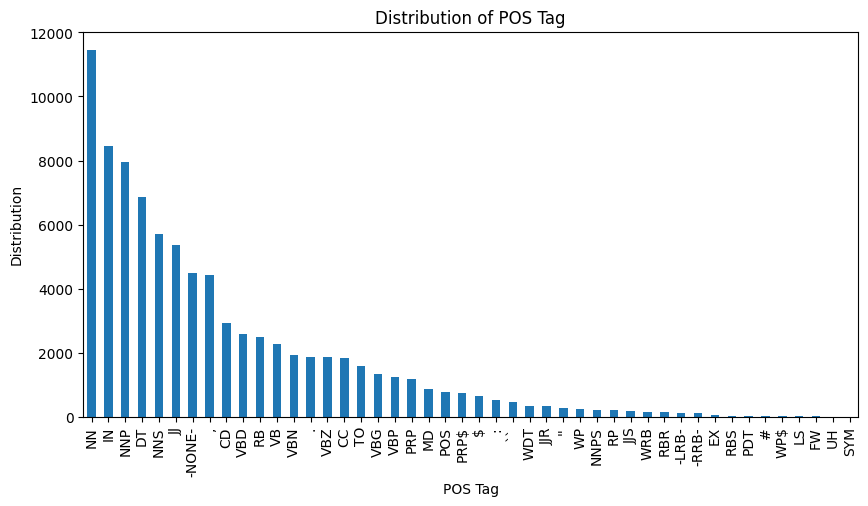

In [106]:
# Distribution of POS Tag
plt.figure(figsize=(10,5))
df["pos_tag"].value_counts().plot(kind='bar')
plt.title('Distribution of POS Tag')
plt.xlabel('POS Tag')
plt.ylabel('Distribution')
plt.show()

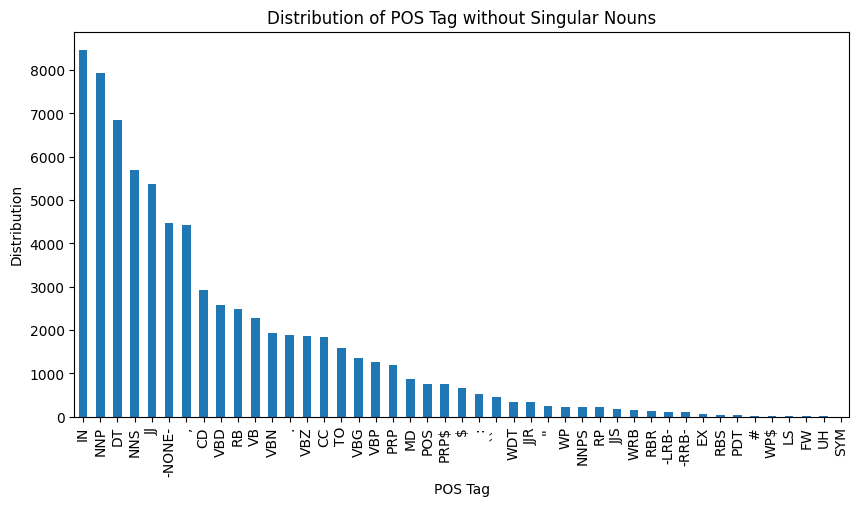

In [107]:
plt.figure(figsize=(10,5))
df_without_singular_nouns = df.loc[(df['pos_tag'] != 'NN')]
df_without_singular_nouns["pos_tag"].value_counts().plot(kind = 'bar')
plt.title('Distribution of POS Tag without Singular Nouns')
plt.xlabel('POS Tag')
plt.ylabel('Distribution')
plt.show()

In [102]:
df.columns

Index(['word', 'is_first', 'is_last', 'is_capitalized', 'is_all_caps',
       'is_all_lower', 'prefix-1', 'prefix-2', 'prefix-3', 'suffix-1',
       'suffix-2', 'suffix-3', 'prev_word', 'next_word', 'pos_tag'],
      dtype='object')

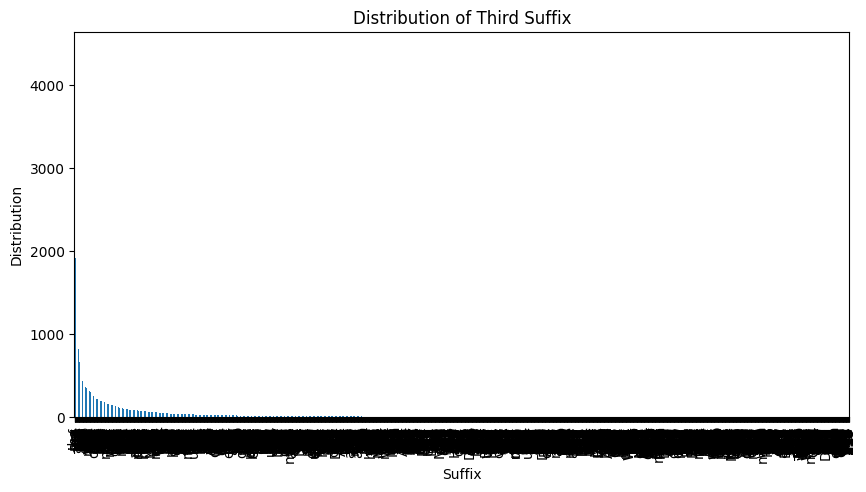

In [118]:
plt.figure(figsize=(10,5))
df["suffix-3"].value_counts().plot(kind='bar')
plt.title('Distribution of Third Suffix')
plt.ylabel('Distribution')
plt.xlabel('Suffix')
plt.show()

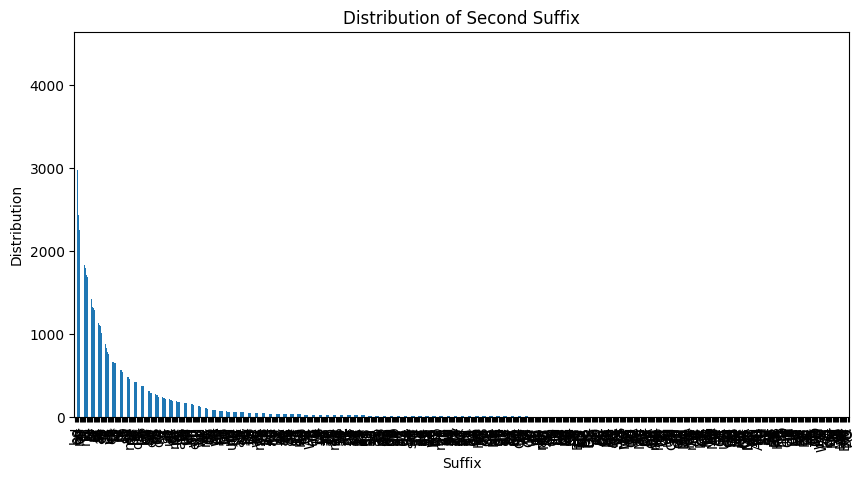

In [117]:
plt.figure(figsize=(10,5))
df["suffix-2"].value_counts().plot(kind='bar')
plt.title('Distribution of Second Suffix')
plt.ylabel('Distribution')
plt.xlabel('Suffix')
plt.show()

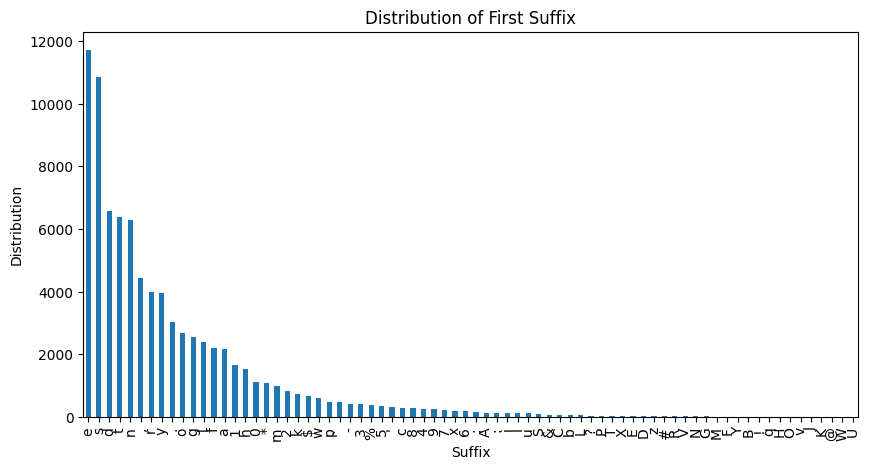

In [116]:
plt.figure(figsize=(10,5))
df["suffix-1"].value_counts().plot(kind='bar')
plt.title('Distribution of First Suffix')
plt.ylabel('Distribution')
plt.xlabel('Suffix')
plt.show()

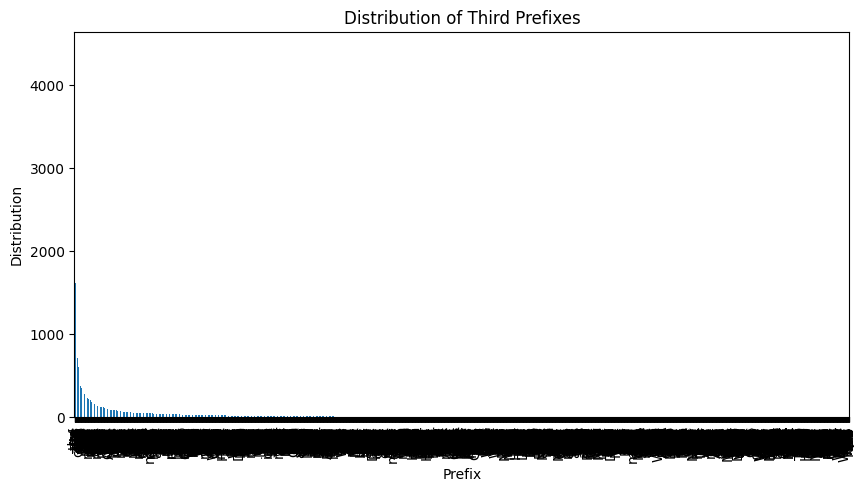

In [115]:
plt.figure(figsize=(10,5))
df["prefix-3"].value_counts().plot(kind='bar')
plt.title('Distribution of Third Prefixes')
plt.ylabel('Distribution')
plt.xlabel('Prefix')
plt.show()

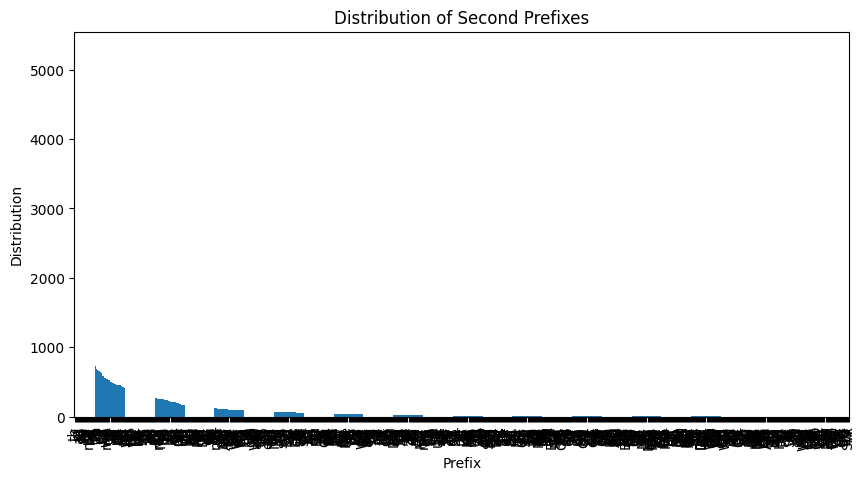

In [114]:
plt.figure(figsize=(10,5))
df["prefix-2"].value_counts().plot(kind='bar')
plt.title('Distribution of Second Prefixes')
plt.ylabel('Distribution')
plt.xlabel('Prefix')
plt.show()

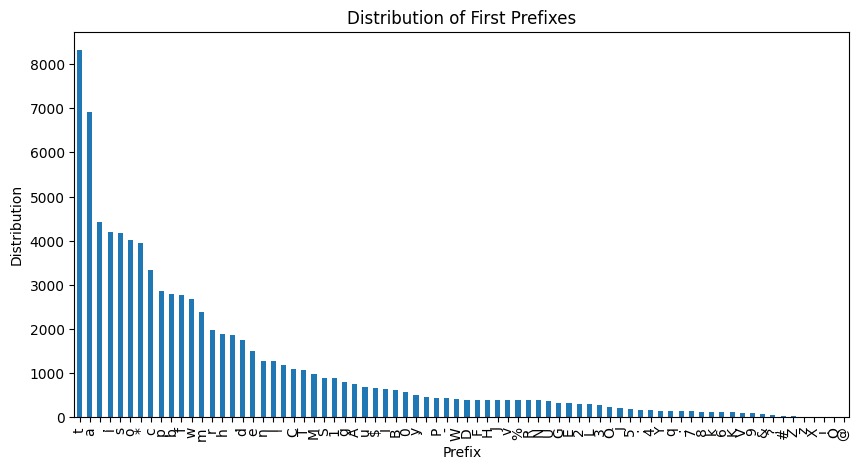

In [113]:
plt.figure(figsize=(10,5))
df["prefix-1"].value_counts().plot(kind='bar')
plt.title('Distribution of First Prefixes')
plt.ylabel('Distribution')
plt.xlabel('Prefix')
plt.show()

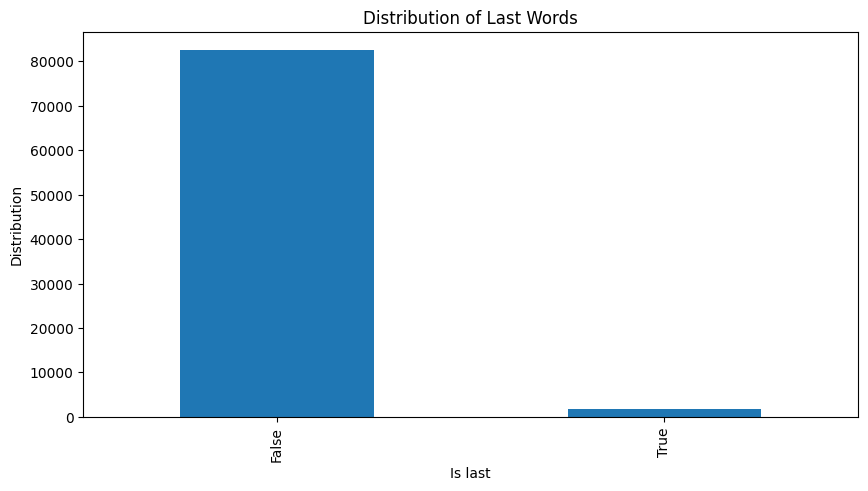

In [112]:
plt.figure(figsize=(10,5))
df["is_last"].value_counts().plot(kind='bar')
plt.title('Distribution of Last Words')
plt.ylabel('Distribution')
plt.xlabel('Is last')
plt.show()

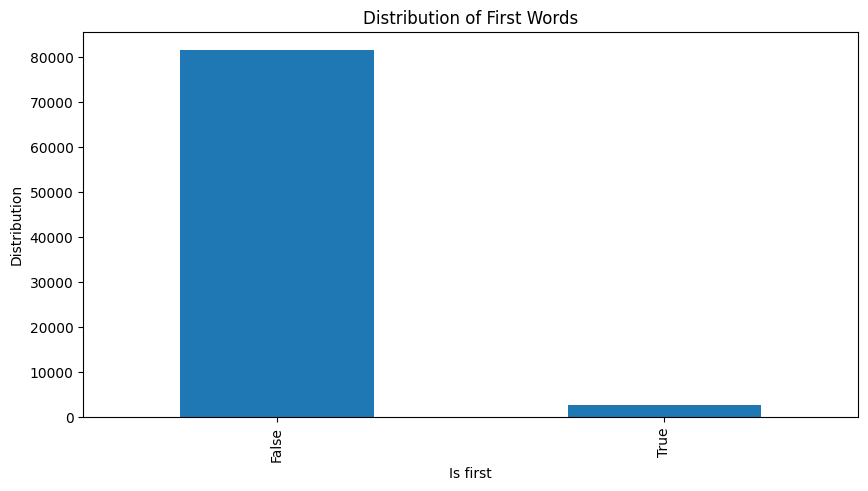

In [108]:
plt.figure(figsize=(10,5))
df["is_first"].value_counts().plot(kind='bar')
plt.title('Distribution of First Words')
plt.ylabel('Distribution')
plt.xlabel('Is first')
plt.show()

In [85]:
df.loc

In [87]:
nouns = df.loc[df['pos_tag'] =="NN"]
nouns

,word,is_first,is_last,is_capitalized,is_all_caps,is_all_lower,prefix-1,prefix-2,prefix-3,suffix-1,suffix-2,suffix-3,prev_word,next_word,pos_tag
10,board,False,False,False,False,True,b,bo,boa,d,rd,ard,the,as,NN
14,director,False,False,False,False,True,d,di,dir,r,or,tor,nonexecutive,Nov.,NN
21,chairman,False,False,False,False,True,c,ch,cha,n,an,man,is,of,NN
29,group,False,False,False,False,True,g,gr,gro,p,up,oup,publishing,.,NN
39,chairman,False,False,False,False,True,c,ch,cha,n,an,man,former,of,NN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100617,action,False,False,False,False,True,a,ac,act,n,on,ion,of,'',NN
100625,authority,False,False,False,False,True,a,au,aut,y,ty,ity,the,without,NN
100628,approval,False,False,False,False,True,a,ap,app,l,al,val,congressional,.,NN
100644,railcar,False,False,False,False,True,r,ra,rai,r,ar,car,500,platforms,NN


In [88]:
allvowels = df.query('word.str.contains("a|e|i|o|u|y")')
allvowels

,word,is_first,is_last,is_capitalized,is_all_caps,is_all_lower,prefix-1,prefix-2,prefix-3,suffix-1,suffix-2,suffix-3,prev_word,next_word,pos_tag
0,Pierre,True,False,True,False,False,P,Pi,Pie,e,re,rre,,Vinken,NNP
1,Vinken,False,False,True,False,False,V,Vi,Vin,n,en,ken,Pierre,",",NNP
4,years,False,False,False,False,True,y,ye,yea,s,rs,ars,61,old,NNS
5,old,False,False,False,False,True,o,ol,old,d,ld,old,years,",",JJ
7,will,False,False,False,False,True,w,wi,wil,l,ll,ill,",",join,MD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100666,begin,False,False,False,False,True,b,be,beg,n,in,gin,to,delivery,VB
100667,delivery,False,False,False,False,True,d,de,del,y,ry,ery,begin,in,NN
100668,in,False,False,False,False,True,i,in,in,n,in,in,delivery,the,IN
100672,of,False,False,False,False,True,o,of,of,f,of,of,quarter,next,IN


In [89]:
pos_tag_count = df.loc[df['pos_tag'] =="NN"].value_counts()
contains_vowels = df.query('word.str.contains("a|e|i|o|u|y")')
pos_tagcount = df['pos_tag'].value_counts()[:]
pos_tagcount

NN        11454
IN         8468
NNP        7945
DT         6847
NNS        5692
JJ         5371
-NONE-     4479
,          4423
CD         2920
VBD        2580
RB         2495
VB         2266
VBN        1930
.          1873
VBZ        1871
CC         1838
TO         1593
VBG        1345
VBP        1250
PRP        1185
MD          866
POS         761
PRP$        742
$           659
:           533
``          460
WDT         343
JJR         341
''          253
WP          223
NNPS        218
RP          211
JJS         170
WRB         159
RBR         131
-LRB-       103
-RRB-        99
EX           52
RBS          34
PDT          26
#            16
WP$          14
LS           12
FW            4
UH            3
SYM           1
Name: pos_tag, dtype: int64

In [109]:
from bokeh.models import ColumnDataSource, CDSView, GroupFilter
from bokeh.io import output_notebook, show

In [90]:

source_Q6 = ColumnDataSource(df)
NN = CDSView(source = source_Q6, filters = [GroupFilter(column_name = "pos_tag", group = 'NN')])
NNS = CDSView (source = source_Q6, filters = [GroupFilter(column_name = "pos_tag", group = 'NNS')])
from bokeh.plotting import figure
p1 = figure(title = "word vs pos_tag(NN and NNS")
p1.triangle('word', 'NNTABLE', source = source_Q6, color = 'blue', size = 8, view = NN, legend = 'noun singular words')
p1.circle('word', 'NNSTABLE', source = source_Q6, color = 'red', size = 8, view = NNS, legend = 'noun plural words')
#p1.vbar(x = temperatures, top = avg + std, width = 0.8, bottom = avg - std, fill_alpha = 0.2, legend = "Lemon Revenue 1 stddev")
p1.legend.location = 'top_left'
show (p1)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "y" value "NNSTABLE" [renderer: GlyphRenderer(id='1061', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "y" value "NNTABLE" [renderer: GlyphRenderer(id='1044', ...)]


In [110]:
import seaborn as sns

In [111]:
sns.pairplot(df, hue = 'pos_tag', kind = 'kde') #this shows the distribution of pos_tags frequency

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f80b6c76a60> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
dfboxplot = df.boxplot(column = 'word', by = 'pos_tag', fontsize=7)

In [ ]:
sns.pairplot(df, hue = 'pos_tag', vars = ['pos_tag', 'word'], diag_kind =None )

# Part 3

In [ ]:
# Classification using different Algorithms
# 1. Logistic Regression
# 2. Naive Bayes
# 3. KNN
# 4. Decision Tree
# 5. Support Vector (SVM)

In [26]:
train_features = features[:100000]
test_features = features[100000:100100]

In [27]:
clf = nltk.NaiveBayesClassifier.train(train_features)
accuracy = nltk.classify.accuracy(clf, test_features)
accuracy

0.99

In [ ]:
print(train_features[0])

({'word': 'pierre', 'is_first': True, 'is_last': False, 'is_capitalized': False, 'is_all_caps': False, 'is_all_lower': True, 'prefix-1': 'p', 'prefix-2': 'pi', 'prefix-3': 'pie', 'suffix-1': 'e', 'suffix-2': 're', 'suffix-3': 'rre', 'prev_word': '', 'next_word': 'vinken'}, 'NNP')


In [ ]:
# Test real world classification:
clf.classify({'word': 'steve'})
# test_features[0]

'NN'